In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### EDA


In [40]:
df_history = pd.read_csv('historic.csv')
df_history.head()

item_no              2815
category             2815
main_promotion       2815
color                2815
stars                2815
success_indicator    2815
dtype: int64


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [25]:
df_history.info()
df_history.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


### Distribution of SuccessIndicator

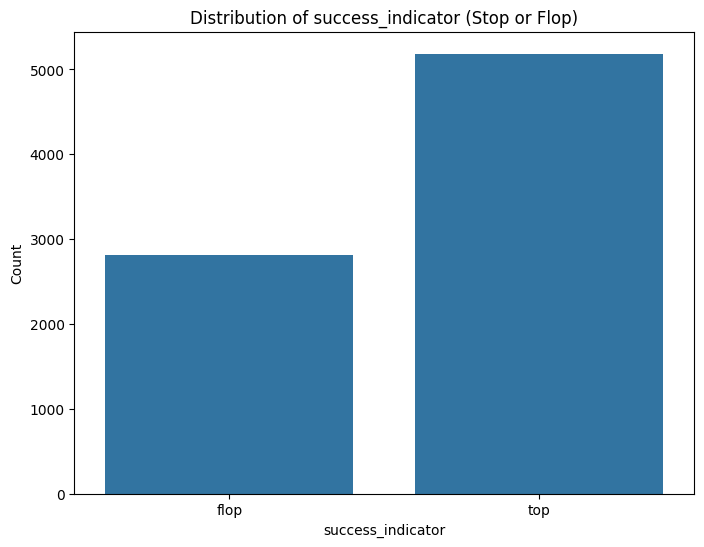

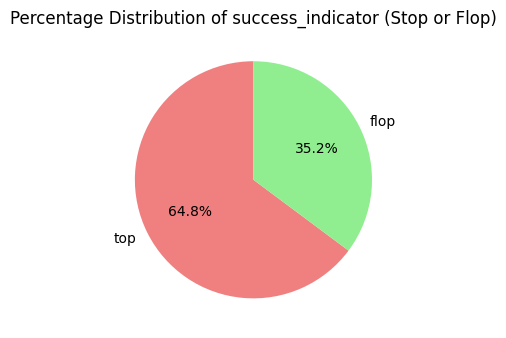

In [45]:
#Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='success_indicator', data=df_history)
plt.title('Distribution of success_indicator (Stop or Flop)')
plt.xlabel('success_indicator')
plt.ylabel('Count')
plt.show()

# PieChart
plt.subplot(1, 2, 2)
labels = df_history['success_indicator'].value_counts().index
sizes = df_history['success_indicator'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage Distribution of success_indicator (Stop or Flop)')

plt.tight_layout()
plt.show()

**We see that out of total products 5185 products are 'top' with 64.8\% and other 2815 are 'flop' with 35.2\%**

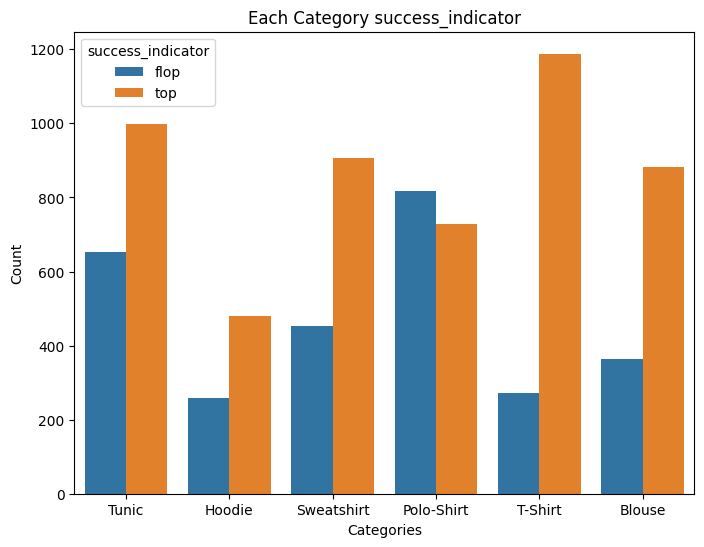

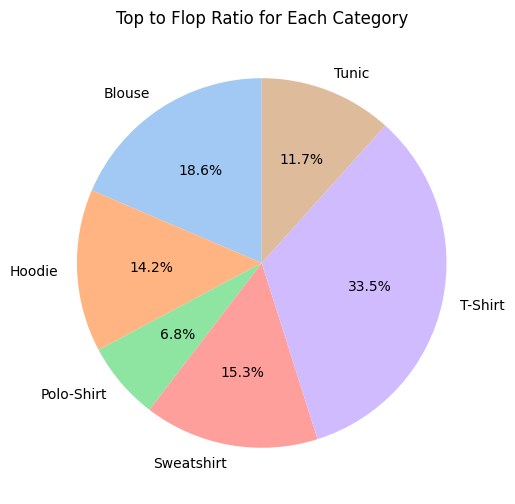

In [63]:
# Bar chart for a category with top categories highlighted
plt.figure(figsize=(8, 6))

sns.countplot(x='category', hue='success_indicator', data=df_history)
plt.title('Each Category success_indicator')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.legend(title='success_indicator')

# Find the top category for each success_indicator
top_categories = df_history.groupby('success_indicator')['category'].value_counts().groupby('success_indicator').idxmax()


plt.show()


# Calculate the ratio of top to flop for each category
category_ratios = df_history.groupby(['category', 'success_indicator']).size().unstack().fillna(0)
category_ratios['ratio_top_to_flop'] = category_ratios['top'] / (category_ratios['flop'])

# Plot the ratios in a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_ratios['ratio_top_to_flop'], labels=category_ratios.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top to Flop Ratio for Each Category')
plt.show()


<h3>Inference</h3>

- Every Category except Polo-Tshirt, 'top' count is more than thier correspinding flop <br>
- count of 'top' success indicator of T-shirt is max out of all <br>


In [72]:


# Ratings > 5 are capped to 5 as max rating is 5 for the dataset
df_history['stars'] = df_history['stars'].apply(lambda x: min(x, 5))
df_history['stars'].unique()
#

array([3.1, 1.5, 4.4, 4.1, 3.9, 1.4, 1.8, 3.2, 5. , 2.5, 3.4, 2.7, 1.7,
       2.8, 4.8, 4. , 4.5, 1.3, 2.6, 3.6, 4.9, 2.2, 3.7, 2.3, 3.8, 4.6,
       3.5, 2.9, 1.6, 3. , 4.2, 1.9, 4.3, 4.7, 2. , 1. , 3.3, 2.4, 1.2,
       2.1, 0.7, 0.9, 0.8, 0.6, 1.1, 0.3])